<img id="top" style="float:left;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
<h3 style="color:#888888;"> <i>--  Simulation numérique en mécanique des fluides  --</i> </h3>
<h1> Exploitation des données <br/> de Top500.org</h1>
<h3> Utilisation de Pandas et etree pour tracer des données xml </h3>
<h4>  </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

In [1]:
import matplotlib
#matplotlib.style.use('seaborn-poster')
matplotlib.style.use('fivethirtyeight')
plt.rc('text', usetex=False)
import xml.etree.ElementTree as ET
import pandas as pd
%matplotlib inline

On s'interesse d'abord à la dernière liste publiée sur <a href="http://top500.org">top500.org</a>

In [3]:
year=2021
mon='11'
source1='TOP500/TOP500_'+str(year)+str(mon)+'_all.xml'

In [4]:
def top_data(source):
    tree = ET.parse(source).getroot()
    namespace={'top500': 'http://www.top500.org/xml/top500/1.0'}
    df = pd.DataFrame(columns=('Rank','System-name','Computer', 'Country','State','City','R-max', 'R-peak', 'Number-of-processors','Power'))
    Europe=['Switzerland','France','Germany','Italy','Spain','United Kingdom','Sweden','Netherlands','Ireland','Belgium','Norway','Denmark','Finland','Austria','Czech Republic','Poland']
    for site in tree:
        if site.find('top500:power',namespace).text==None:
           site.find('top500:power',namespace).text='0'
        if site.find('top500:country',namespace).text in Europe:
           site.find('top500:state',namespace).text=site.find('top500:country',namespace).text
           site.find('top500:country',namespace).text='Europe'
           
        row = dict(zip(['Rank','System-name','Computer', 'Country','State','City','R-max', 'R-peak', 'Number-of-processors','Power'],
                   [site.find('top500:rank',namespace).text,site.find('top500:system-name',namespace).text,
                    site.find('top500:computer',namespace).text,site.find('top500:country',namespace).text,
                    site.find('top500:state',namespace).text,site.find('top500:town',namespace).text,
                    float(site.find('top500:r-max',namespace).text)/1e6,
                    float(site.find('top500:r-peak',namespace).text)/1e6,
                    float(site.find('top500:number-of-processors',namespace).text)/1e6,
                    float(site.find('top500:power',namespace).text)]))
        row_s = pd.Series(row)
        row_s.name = site[1].text
        df = df.append(row_s)
    return df

df=top_data(source1)
df.to_csv('TOP500_'+mon+'-'+str(year)+'.csv')
df[:10][['Rank','Country','Computer','System-name','R-peak','Number-of-processors','Power']].to_csv('top10.csv',';')
df[df['Country']=='Europe'][['Rank','State','City','System-name','R-peak','Number-of-processors','Power']][:10].to_csv('top10_eu.csv',';')
df[df['State'] == 'France'][:10].to_csv('top10_fr.csv',';')

In [5]:
print(df[:10][['Rank','Country','Number-of-processors','R-peak','Power']])

       Rank        Country  Number-of-processors      R-peak    Power
179807    1          Japan              7.630848  537.212000  29899.2
179397    2  United States              2.414592  200.794880  10096.0
179398    3  United States              1.572480  125.712000   7438.3
178764    4          China             10.649600  125.435904  15371.0
179972    5  United States              0.761856   93.750000   2589.0
179842    6  United States              0.555520   79.215000   2646.0
177999    7          China              4.981760  100.678664  18482.0
179894    8         Europe              0.449280   70.980000   1764.2
179856    9         Europe              0.669760   51.720760   2252.2
180024   10  United States              0.253440   39.531150      0.0


In [6]:
print(df[df['Country']=='Europe'][['Rank','State','Number-of-processors','System-name','R-peak','Power']][:10])

       Rank           State  Number-of-processors            System-name  \
179894    8         Germany              0.449280  JUWELS Booster Module   
179856    9           Italy              0.669760                   HPC5   
180031   14          France              0.810240                 CEA-HF   
179845   18           Italy              0.347776            Marconi-100   
177824   20     Switzerland              0.387872              Piz Daint   
180036   22  United Kingdom              0.716800                ARCHER2   
179566   23         Germany              0.305856            SuperMUC-NG   
179880   24         Germany              0.698880                   Hawk   
179689   29          France              0.291024             PANGEA III   
179968   34     Netherlands              0.157440            Pioneer-WEU   

           R-peak   Power  
179894  70.980000  1764.2  
179856  51.720760  2252.2  
180031  31.761400  4959.5  
179845  29.354000  1476.0  
177824  27.154300  2384

In [7]:
print(df[df['State']=='France'][['Rank','City','System-name','R-peak','Power']][:10])

       Rank                City        System-name     R-peak   Power
180031   14  Bruyeres-le-Chatel             CEA-HF  31.761400  4959.5
179689   29                 Pau         PANGEA III  25.025810  1367.0
179412   42  Bruyeres-le-Chatel        Tera-1000-2  23.396352  3178.0
179892   58            Toulouse            Taranis  10.321920  1672.0
179853   64            Toulouse            Belenos  10.469376  1655.0
179700   69  Bruyeres-le-Chatel  JOLIOT-CURIE ROME  12.039373  1436.0
178071   93                 Pau             Pangea   6.712320  4150.0
179692  105                None           Jean Zay   7.345562     0.0
179899  109        Val de reuil             CRONOS   7.136870  1225.5
179411  113  Bruyeres-le-Chatel   JOLIOT-CURIE SKL   6.635520   917.0


On peut représenter ça de façon synthétique avec des histogrammes:

In [8]:
main_zone=['Europe','China','United States','Japan','Russia','Canada','India','Saudi Arabia']
Classmt_Country=df.groupby('Country').sum()


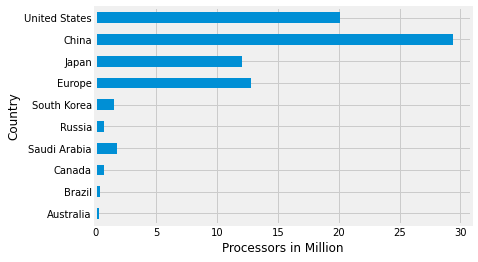

In [9]:
Classmt_Country=df.groupby('Country').sum().sort_values('R-peak')
Classmt_Country['Number-of-processors'][-10:].plot(kind='barh')
plt.xlabel('Processors in Million')
plt.savefig('TOP500/Figures/Procs_'+str(year)+'_'+str(mon)+'.png',bbox_inches='tight',dpi=120)

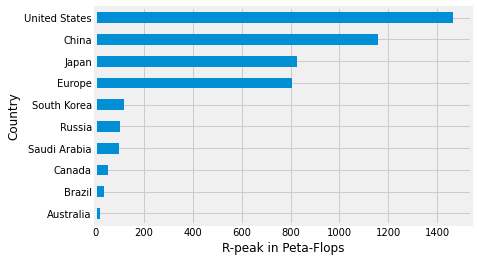

In [10]:
Classmt_Country['R-peak'][-10:].plot(kind='barh')
plt.xlabel('R-peak in Peta-Flops')
plt.savefig('TOP500/Figures/Rpeak_'+str(year)+'_'+str(mon)+'.png',bbox_inches='tight',dpi=120)

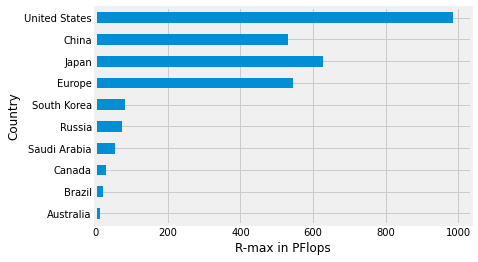

In [11]:
Classmt_Country['R-max'][-10:].plot(kind='barh')
plt.xlabel('R-max in PFlops')
plt.savefig('TOP500/Figures/Rmax_'+str(year)+'_'+str(mon)+'.png',bbox_inches='tight',dpi=120)

Maintenant on va s'intéresser à l'évolution des classements dans le temps:

In [12]:
def time_data(source):
    tree = ET.parse(source).getroot()
    namespace={'top500': 'http://www.top500.org/xml/top500/1.0'}
    df = pd.DataFrame(columns=('Rank','Country','R-max', 'R-peak','Number-of-processors'))
    Europe=['Switzerland','France','Germany','Italy','Spain','United Kingdom','Sweden','Netherlands','Ireland','Belgium','Norway','Denmark','Finland','Austria','Czech Republic','Poland']
    for site in tree:
        if site.find('top500:country',namespace).text in Europe:
            site.find('top500:country',namespace).text='Europe'
        row = dict(zip(['Rank','Country','R-max', 'R-peak','Number-of-processors'],
                   [site.find('top500:rank',namespace).text,site.find('top500:country',namespace).text,
                    float(site.find('top500:r-max',namespace).text)/1e6,
                    float(site.find('top500:r-peak',namespace).text)/1e6,
                    float(site.find('top500:number-of-processors',namespace).text)/1e6]))
        row_s = pd.Series(row)
        row_s.name = site[1].text
        df = df.append(row_s)
    return df


main_zone=['Europe','China','United States','Japan']
def feed_time(ts,year,kind='Number-of-processors'):
    source1='TOP500/TOP500_'+str(year)+'06_all.xml'
    if year<2019:
        source2='TOP500/TOP500_'+str(year)+'11_all.xml'
    else:
        source2='TOP500/TOP500_'+str(year)+'06_all.xml'
    df1=time_data(source1)
    df2=time_data(source2)    
    tot1=df1[kind].sum()/100.
    tot2=df2[kind].sum()/100.
    Classmt_Country=df1.groupby('Country').sum()/tot1
    row=dict(Classmt_Country[kind][main_zone])
    row_y = pd.Series(row)
    row_y.name = year    
    ts=ts.append(row_y)    
    Classmt_Country=df2.groupby('Country').sum()/tot2
    row=dict(Classmt_Country[kind][main_zone])
    row_y = pd.Series(row)
    row_y.name = year+0.5    
    ts=ts.append(row_y)   
    return ts


In [13]:
ts_proc= pd.DataFrame(columns=main_zone)
ts_flops= pd.DataFrame(columns=main_zone)
time=range(2007,2022)

for year in time:
    print(year)
    ts_proc=feed_time(ts_proc,year)
    ts_flops=feed_time(ts_flops,year,kind='R-peak')

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


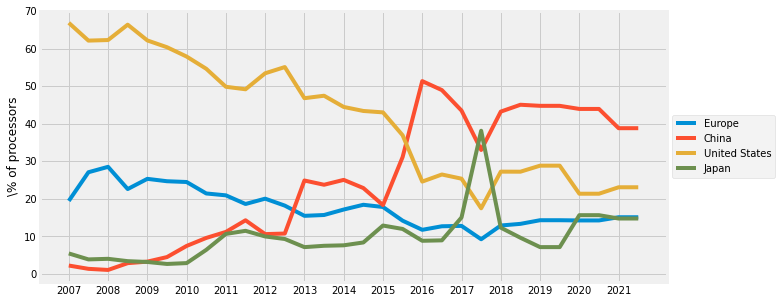

In [14]:
ts_proc.plot(figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(time,(str(t) for t in time))
plt.ylabel('\% of processors')
plt.savefig('TOP500/Figures/Cores_history.png',bbox_inches='tight',dpi=120)

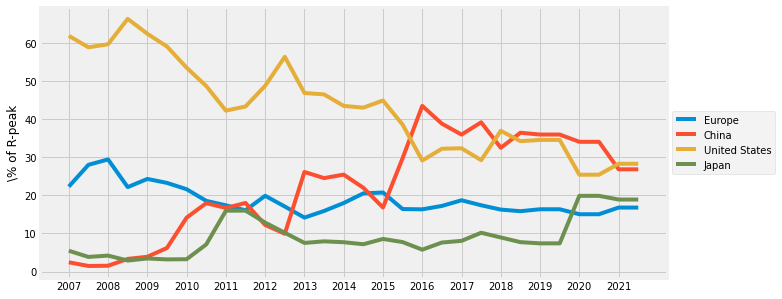

In [15]:
ts_flops.plot(figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(time,(str(t) for t in time))
plt.ylabel('\% of R-peak')
plt.savefig('TOP500/Figures/R-peak_history.png',bbox_inches='tight',dpi=120)

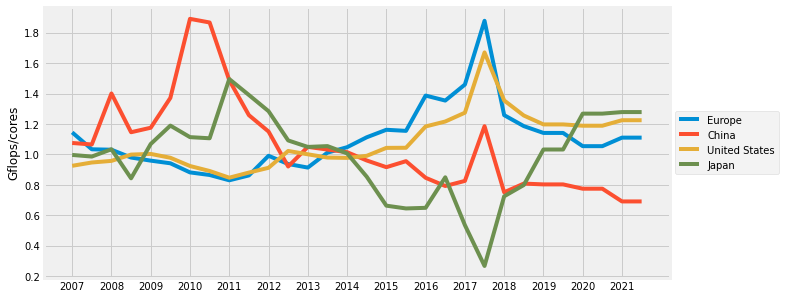

In [16]:
ratio=ts_flops/ts_proc
ratio.plot(figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(time,(str(t) for t in time))
plt.ylabel('Gflops/cores')
plt.savefig('TOP500/Figures/Flopratio_history.png',bbox_inches='tight',dpi=120)

In [1]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<img id="top" style="float:left;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>